## 머신러닝
### 1번 군집분석
#### 다음은 온라인 유통회사 A사의 고객의 물품 구매 정보에 대한 데이터이다. A 회사는 RMF(Recency, Monetary, Frequency) 중에서 F와 M를 기준으로 고객 군집 분석을 시행하고자 한다. 다음 물음에 답하시오.

데이터 설명
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

In [39]:
import ssl
import pandas as pd
import urllib
import numpy as np
context = ssl._create_unverified_context()

url1 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/8주차_0709/data/problem1.csv'
encoded_url1 = urllib.parse.quote(url1, safe=':/')

response = urllib.request.urlopen(encoded_url1, context=context)
df1 = pd.read_csv(response, encoding='utf-8')
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,Germany
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany
...,...,...,...,...,...,...,...,...
41019,560590,21884,CAKES AND BOWS GIFT TAPE,12,7/19/2011 15:55,0.65,12560.0,Germany
41020,561870,21156,RETROSPOT CHILDRENS APRON,8,7/31/2011 11:45,1.95,14911.0,EIRE
41021,579792,22436,12 COLOURED PARTY BALLOONS,20,11/30/2011 15:43,0.65,12714.0,France
41022,C566753,22796,PHOTO FRAME 3 CLASSIC HANGING,-1,9/14/2011 15:48,9.95,14911.0,EIRE


In [40]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,41024.000000,41024.000000,41024.000000
mean,19.425507,4.652498,13173.076102
std,44.253624,45.383856,1006.392842
min,-480.000000,0.000000,12348.000000
25%,4.000000,1.250000,12484.000000
50%,10.000000,1.950000,12647.000000
75%,16.000000,3.750000,14156.000000
max,2400.000000,4161.060000,17097.000000


In [41]:
## qunatitiy 가 음수일 수는 없으며, 해당값들은 오입력건으로 보고 양수로 변경해 줌
# df1['Quantity_new'] = df1['Quantity'].map(lambda x:x*-1 if x < 0 else x)
df1['Quantity_new'] = np.abs(df1['Quantity'])

In [42]:
df1.describe()

,Quantity,UnitPrice,CustomerID,Quantity_new
count,41024.000000,41024.000000,41024.000000,41024.000000
mean,19.425507,4.652498,13173.076102,19.956562
std,44.253624,45.383856,1006.392842,44.016687
min,-480.000000,0.000000,12348.000000,1.000000
25%,4.000000,1.250000,12484.000000,4.000000
50%,10.000000,1.950000,12647.000000,10.000000
75%,16.000000,3.750000,14156.000000,16.000000
max,2400.000000,4161.060000,17097.000000,2400.000000


#### 1.1 F(소비자별 구매빈도), M(소비자별 총 구매액) feature를 새로 생성하시오.

In [43]:
소비자별_구매빈도 = df1[['CustomerID','UnitPrice']].groupby('CustomerID').agg('count').rename(columns={'UnitPrice':'F'})

df1['총구매액'] = df1.Quantity_new * df1.UnitPrice
소비자별_총구매액 = df1[['CustomerID','총구매액']].groupby('CustomerID').agg('sum').rename(columns={'총구매액':'M'})
국가 = df1[['CustomerID','Country']].drop_duplicates()
df1_v2 = pd.merge(소비자별_구매빈도, 소비자별_총구매액, on='CustomerID')
# df1_v2 = pd.merge(df1_v2_tmp, 국가, on='CustomerID')

#### 1.2 새로 생성된 데이터를 기준으로 EDA를 진행하고 이상치를 제거하고, 필요하다면 다른 전처리를 수행하시오.

In [44]:
df1_v2.describe()

,F,M
count,348.000000,348.000000
mean,117.885057,4259.373851
std,354.247025,19560.087699
min,1.000000,4.500000
25%,23.000000,462.967500
50%,51.500000,1040.175000
75%,113.250000,2851.732500
max,5903.000000,280923.020000


In [45]:
class font_setting():
    def __init__(self):
        self.font_url = "https://github.com/google/fonts/blob/main/ofl/nanumgothic/NanumGothic-Regular.ttf?raw=true"
        self.path = "./NanumGothic-Regular.ttf"
        
    def get_font(self):
        import requests
        from matplotlib import font_manager, rc
        import matplotlib.pyplot as plt
        
        res = requests.get(self.font_url)
        
        with open(self.path, "wb") as font_file:
            font_file.write(res.content)
        
        font_manager.fontManager.ttflist += font_manager.createFontList([self.path])
        rc('font', family='NanumGothic')
        plt.rcParams["font.family"] = 'NanumGothic'
    
    def delete_font(self):
        import os
        os.remove(self.path)

font_set = font_setting()
font_set.get_font()

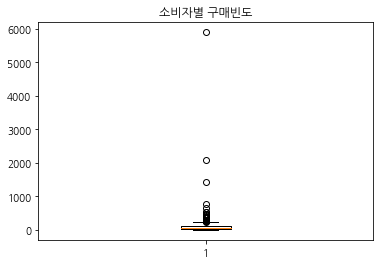

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.boxplot(df1_v2['F'])
plt.title('소비자별 구매빈도')
plt.show()

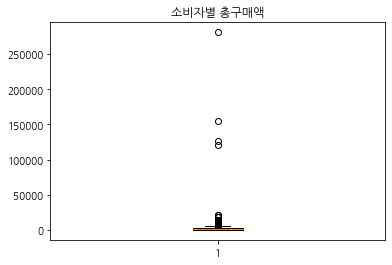

In [47]:
plt.boxplot(df1_v2['M'])
plt.title('소비자별 총구매액')
plt.show()

In [ ]:
# 국가별로 
plt.figure(figsize=(20,6))
sns.boxplot(x='Country', y='F', data=df1_v2)
plt.show()

#### 1.3 적합한 군집분석 알고리즘을 선택하고 시행한 후, 시행 결과에 대해 응집도와 분리도 관점에서 평가하시오.

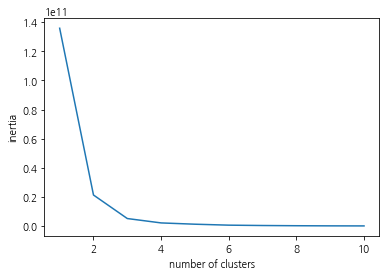

In [49]:
from sklearn.cluster import KMeans

x = np.array(df1_v2).reshape(-1,1)
inertia = []
for i in range(1,11):
    kmeans_plus = KMeans(n_clusters=i, init='k-means++')
    kmeans_plus.fit(x)
    inertia.append(kmeans_plus.inertia_)

plt.plot(range(1,11), inertia)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [50]:
## 클러스터링 -> 비지도학습은 평가하기 어려우나 군집화의 성능을 비교하는데 '실루엣계수' 사용

# 실루엣계수 : 각군집간 거리 얼마나 효율적 분리되어있는지 나타냄. 다른군집과 거리 떨어져있고 동일군집끼리 데이터 가까움
# 1 = 근처군집과 더 멀리 떨어져있음(잘분리) , 0 = 근처군집과 가까워짐, - = 아예다른군집에 데이터 할당
# 좋은군집 조건
# 1. 전체실루엣계수 평균값이 0~1사이, 1가까울수록 좋음
# 2. 개별 군집의 평균값의 편차 크지않아야 함(즉 개별군집의 실루엣계수평균값이 전체 실루엣 계수 평균값에서 크게 벗어나지 않아야함)

## 주의: x_feature 데이터프레임 과 cluster저장할 테이블 분리해서 사용하기!
from sklearn.metrics import silhouette_score, silhouette_samples
X_feature = pd.DataFrame(df1_v2) # 학습데이터 2d array로 해줘야함
df_cluster = X_feature

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_cluster)
df_cluster['cluster'] = kmeans.labels_

## 모든 개별 데이터에 실루엣 계수값 구하기
score_samples = silhouette_samples(X_feature, df1_v2['cluster'])
df_cluster['silhouette_coeff'] = score_samples

## 평균실루엣 계수값 구함 = silhouette_score(X feature 데이터세트, 군집된 label값)
average_score = silhouette_score(X_feature, df_cluster['cluster'])
print('실루엣계수 스코어:{0:.3f}'.format(average_score))

실루엣계수 스코어:0.978


In [51]:
## 군집 칼럼별로 실루엣계수 구하기
df_cluster.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.983133
1    0.499040
Name: silhouette_coeff, dtype: float64

In [52]:
df1_v2_cluster = pd.merge(df_cluster, 국가, on='CustomerID')
df1_v2_cluster

,CustomerID,F,M,cluster,silhouette_coeff,Country
0,12348.0,31,1797.24,0,0.988455,Finland
1,12349.0,73,1757.55,0,0.988527,Italy
2,12350.0,17,334.40,0,0.988044,Norway
3,12352.0,95,3466.67,0,0.983813,Norway
4,12354.0,58,1079.40,0,0.989204,Spain
...,...,...,...,...,...,...
348,14935.0,10,1784.71,0,0.988468,Channel Islands
349,14936.0,366,8156.62,0,0.960628,Channel Islands
350,14937.0,35,1626.13,0,0.988721,Channel Islands
351,16321.0,16,516.60,0,0.988632,Australia


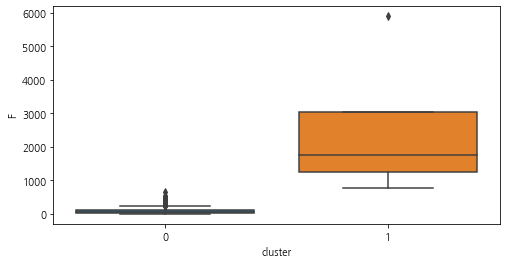

In [53]:
plt.figure(figsize=(8,4))
sns.boxplot(x='cluster', y='F', data=df1_v2_cluster)
plt.show()

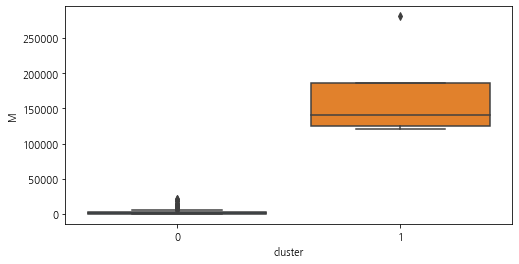

In [54]:
plt.figure(figsize=(8,4))
sns.boxplot(x='cluster', y='M', data=df1_v2_cluster)
plt.show()

#### 1.4 각 군집별 특성에 대한 의견과 비즈니스적 인사이트를 제시하시오

### 2번 시계열분석

#### 데이터 설명
- 각 raw는 관광지 A의 1990년 1월 부터 25년동안의 매달 평균 이용객 숫자이다.

In [55]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url2 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/8주차_0709/data/problem2.csv'
encoded_url2 = urllib.parse.quote(url2, safe=':/')

response2 = urllib.request.urlopen(encoded_url2, context=context)
df2 = pd.read_csv(response2, encoding='utf-8', index_col=0)
df2

,counts
0,544.3
1,603.1
2,NaN
3,533.4
4,619.5
...,...
295,445.2
296,472.0
297,341.6
298,477.8


In [56]:
from datetime import datetime, timedelta

start_date = datetime(1990, 1, 1)  # 시작 날짜
num_months = 300  # 생성할 월 수

# 매월 일자 생성
dates = []
for i in range(num_months):
    date = start_date + timedelta(days=30 * i)
    dates.append(date)

# # 생성된 일자 출력
# for date in dates:
#     print(date.strftime('%Y-%m-%d'))

In [57]:
df2['date'] = dates
df2.set_index('date', inplace=True)

#### 2-1 EDA와 시각화를 진행하라

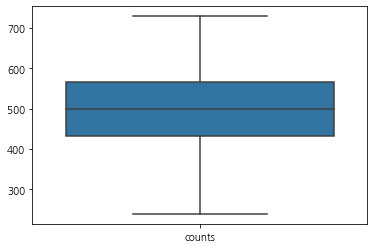

In [58]:
sns.boxplot(df2)
plt.show()

#### 2-2 결측치 처리와 해당 결측치 처리 방식에 대한 논리적 근거를 제시하라

In [59]:
# 시계열 데이터이므로 결측치 처리 : 직전 값으로 대체
df2.isnull().sum()
df2 = df2.fillna(method= 'ffill')

#### 2-3 계절성을 반영한 시계열 모델을 제시하고 정확도 측면에서 모델 성능 평가 할 것

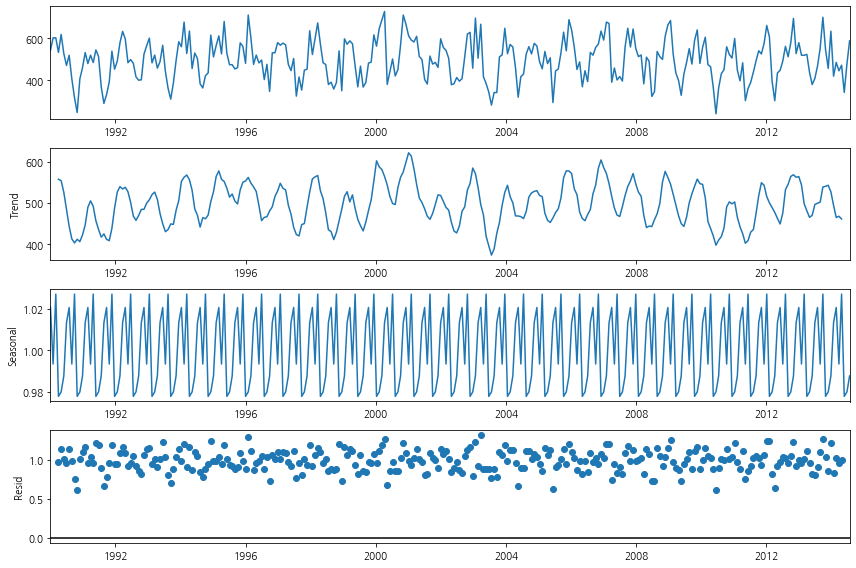

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = df2
result = seasonal_decompose(ts, model = 'multiplicative')
plt.rcParams['figure.figsize'] = [12,8]
result.plot()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(diff_data)

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

## arima 모델링
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts, order=(1,0,1), trend='ctt')
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 counts   No. Observations:                  300
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1753.167
Date:                Sun, 09 Jul 2023   AIC                           3518.334
Time:                        12:00:20   BIC                           3540.557
Sample:                    01-01-1990   HQIC                          3527.228
                         - 07-24-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        484.2450     33.592     14.416      0.000     418.407     550.083
x1             0.2624      0.484      0.542      0.588      -0.686       1.211
x2            -0.0008      0.002     -0.544      0.586      -0.004       0.002
ar.L1          0.5424      0.100      5.437      0.000       0.347       0.738
ma.L1         -0.0483      0.120     -0.402      0.688      -0.284       0.187
sigma2      7015.7054    614.473     11.417      0.000    5811.360    8220.051
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.97   Prob(JB):                         0.67
Heteroskedasticity (H):               1.18   Skew:                            -0.09
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### 2-4 분석 결과 활용 가능 여부에 대한 분석 전문가로서의 제안

## 통계
### 3. 기본 통계 및 확률 문제

#### 3-1 서울에서 영동까지 100km/h로 가고 영동에서 서울까지 80km/로 돌아왔을 때, 평균 속도는?

In [23]:
time_seoul_to_yeongdong = 100 / 100
time_yeongdong_to_seoul = 100 / 80

total_distance = 100 + 100
total_time = time_seoul_to_yeongdong + time_yeongdong_to_seoul

average_speed = total_distance / total_time
print(average_speed)

88.88888888888889


#### 3-2 이전의 연매출이 3000이고 올해의 연매출이 4000, 내년의 연매출이 5000으로 늘어날 예정이라면 연평균 몇배가 증가한 것인가?

In [20]:
(5000 / 3000) ** (1 / 3) - 1

0.1856311014966876

#### 3-3 남성, 여성의 등산, 수영에 대한 취미 선호도 빈도표(2x2)를 보고, 남성 중에서 등산을 좋아할 확률을 구하시오

<img width="300" src="https://github.com/Ssunbell/Algorithm_Study/assets/97590480/98463d13-fa90-455b-a03c-a21701652dc1">

In [21]:
data = pd.DataFrame({'등산': [20, 10], '수영': [10, 30]}, index=['남자', '여자'])
data.loc['남자', '등산'] / data['등산'].sum()

0.6666666666666666

#### 3-4 표본 10개의 분산이 90일 때 신뢰도 95%로 모분산의 신뢰구간을 추정하라

In [1]:
import scipy.stats as stats
import math

sample_variance = 90
sample_size = 10
confidence_level = 0.95

chi2_upper = stats.chi2.ppf((1 + confidence_level) / 2, df=sample_size - 1)
confidence_interval = [(sample_size - 1) * sample_variance / chi2_upper, (sample_size - 1) * sample_variance / stats.chi2.ppf((1 - confidence_level) / 2, df=sample_size - 1)]
print(confidence_interval)

[42.58055444790953, 299.95672846672363]


### 4번 임상 대상 20명에 대해 혈압약 투약 이전과 이후의 차이가 24, 표준편차 9  신뢰구간 95%이고 혈압약 투약 이전과 이후의 차이가 존재하는지 확인하려한다.

#### 4-1 귀무가설과 연구가설을 제시하시오

#### 4-2 검정 후 귀무가설 기각 여부 제시

### 5번 공장 X,Y,Z의 평균 출하 소요시간을 여러 일자에 거쳐 측정한 데이터이다. 각 공장의 중위수의 차이가 존재하는지 확인하려 한다.

In [3]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url3 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/8주차_0709/data/problem5.csv'
encoded_url3 = urllib.parse.quote(url3, safe=':/')

response3 = urllib.request.urlopen(encoded_url3, context=context)
df3 = pd.read_csv(response3, encoding='utf-8')
df3

,출하 소요시간,공장,공장별 출하 소요시간 순위
0,71,Z,11
1,75,X,14
2,71,X,12
3,53,Z,1
4,50,X,1
5,64,Z,6
6,58,Y,2
7,71,Z,12
8,76,Y,14
9,67,Y,8


#### 5-1. 연구가설과 귀무가설을 설정하시오

In [15]:
import pandas as pd
from scipy.stats import kruskal

x_times = df3[df3[' 공장'] == 'x']['출하 소요시간']
y_times = df3[df3[' 공장'] == 'y']['출하 소요시간']
z_times = df3[df3[' 공장'] == 'z']['출하 소요시간']

# Kruskal-Wallis 검정 수행
statistic, p_value = kruskal(x_times, y_times, z_times)
print(p_value)

nan


In [10]:
df3.columns

Index(['출하 소요시간', ' 공장', ' 공장별 출하 소요시간 순위'], dtype='object')

#### 5-2. 검정통계량을 구하고 가설을 채택하시오

### 6번 다음은 A사의 투자 방안에 대한 표이다. 3년동안의 1~5안의 투자금액을 참고하여 1개년 50억원, 2개년 60억원, 3개년 70억원의 예산을 가지고 NPV(순현재가치)가 가장 높아지는 안을 제시하시오.

<img width="300" src="https://github.com/Ssunbell/Algorithm_Study/assets/97590480/33f192c2-1103-4f88-ae36-f1ed0fbb9e18">